Представьте, что вы работаете в крупном дейтинговом приложении.

Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

Проверьте:

Был ли эксперимент успешен в целом.
Проанализируйте, имеет ли нововведение смысл среди каких-либо конкретных групп пользователей.
*Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.

  

Данные
Всего есть три группы: тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2). Для каждой из них:

users_*.csv – информация о пользователях:

uid – идентификатор пользователя
age – возраст
attraction_coeff – коэффициент привлекательности (от 0 до 1000, \frac{лайки}{просмотры}*1000 
просмотры
лайки

 ∗1000)
coins – число монеток (внутренняя валюта)
country – страна  
visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)
gender – пол
age_filter_start  – фильтр поиска, мин. значение 
age_filter_end  – фильтр поиска, макс. значение 
views_count – число полученных оценок 
was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)
is_premium –  является ли премиум
total_revenue – нормированная выручка
 
transactions_*.csv – информация о платежах пользователей:

uid – идентификатор пользователя
country – страна
joined_at – дата и время регистрации
paid_at – дата и время покупки
revenue – нормированная выручка
payment_id – идентификатор платежа
from_page – откуда пользователь перешел на страницу оплаты
product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое)
 
Файлы:

users_test – информация о пользователях в тестовой группе. 
users_control_1 – информация о пользователях в первой контрольной группе. 
users_control_2 – информация о пользователях во второй контрольной группе . 
transactions_test – информация о платежах пользователей в тестовой группе. 
transactions_control_1 – информация о платежах пользователей в первой контрольной группе. 
transactions_control_2 – информация о платежах пользователей во второй контрольной группе 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from scipy import stats
%matplotlib inline

from urllib.parse import urlencode

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

users_test_link = 'https://disk.yandex.ru/d/L8HxRYDn2l4h9A'
users_control_1_link = 'https://disk.yandex.ru/d/TxOD_JxnkMd4mA'
users_control_2_link = 'https://disk.yandex.ru/d/YT6OWRK2cTWfLg'
transactions_test_link = 'https://disk.yandex.ru/d/3viYBnm7cyihkQ'
transactions_control_1_link = 'https://disk.yandex.ru/d/84jzzJeQ4tqVyg'
transactions_control_2_link = 'https://disk.yandex.ru/d/_pOo7mrDCZZMyA'


users_test_response = requests.get(base_url + urlencode({'public_key': users_test_link}))
users_control_1_response = requests.get(base_url + urlencode({'public_key': users_control_1_link}))
users_control_2_response = requests.get(base_url + urlencode({'public_key': users_control_2_link}))
transactions_test_response = requests.get(base_url + urlencode({'public_key': transactions_test_link}))
transactions_control_1_response = requests.get(base_url + urlencode({'public_key': transactions_control_1_link}))
transactions_control_2_response = requests.get(base_url + urlencode({'public_key': transactions_control_2_link}))

users_test_file_link = json.loads(users_test_response.text)['href']
users_control_1_file_link = json.loads(users_control_1_response.text)['href']
users_control_2_file_link = json.loads(users_control_2_response.text)['href']
transactions_test_file_link = json.loads(transactions_test_response.text)['href']
transactions_control_1_file_link = json.loads(transactions_control_1_response.text)['href']
transactions_control_2_file_link = json.loads(transactions_control_2_response.text)['href']

users_test = pd.read_csv(users_test_file_link, encoding='windows-1251', sep=';')
users_control_1 = pd.read_csv(users_control_1_file_link, encoding='windows-1251', sep=';')
users_control_2 = pd.read_csv(users_control_2_file_link, encoding='windows-1251', sep=';')
tr_test = pd.read_csv(transactions_test_file_link, encoding='windows-1251', sep=';')
tr_control_1 = pd.read_csv(transactions_control_1_file_link, encoding='windows-1251', sep=';')
tr_control_2 = pd.read_csv(transactions_control_2_file_link, encoding='windows-1251', sep=';')

In [3]:
users_test = pd.read_csv(users_test_file_link, encoding='windows-1251', sep=';')
users_control_1 = pd.read_csv(users_control_1_file_link, encoding='windows-1251', sep=';')
users_control_2 = pd.read_csv(users_control_2_file_link, encoding='windows-1251', sep=';')
tr_test = pd.read_csv(transactions_test_file_link, encoding='windows-1251', sep=';')
tr_control_1 = pd.read_csv(transactions_control_1_file_link, encoding='windows-1251', sep=';')
tr_control_2 = pd.read_csv(transactions_control_2_file_link, encoding='windows-1251', sep=';')

### Взглянем на данные
*Users:*
* `uid` - id
* `age` - возраст
* `attraction_coeff` - коеф привлекательности (0-1000)
* `coins` - внутренняя валюта
* `country` - страна
* `visit_days` - в какие дни были посещения после регистрации
* `gender` - пол
* `age_filter_start` - фильтр поиска
* `age_filter_end` - фильтр поиска
* `views_count` - число полученных оценок
* `was_premium` - был ли когда-то премиум
* `is_premium` - есть ли сейчас преиум
* `total_revenue` - нормированная выручка


*Transactions:*
* `uid` - id
* `country` - страна
* `joined_at` - дата и время регистрации 
* `paid_id` - дата и время покупки
* `payment_id` - идентификатор платежа
* `from_page` - откуда пользователь перешел на страницу оплаты
* `product_type` - тип продукта
* `revenue` - нормированная выручка

In [4]:
# посмотрим на данные и проведем предобработку
tr_control_1.head(2)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium


In [5]:
users_control_2.head(2)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0


Обработаем пропуски:

In [6]:
# У монеток пропуски будем считать нулями
users_control_1['coins'].fillna(0, inplace=True)
users_control_2['coins'].fillna(0, inplace=True)
users_test['coins'].fillna(0, inplace=True)

# У визитов будем считать, что не посещал
users_control_1['visit_days'].fillna(0, inplace=True)
users_control_2['visit_days'].fillna(0, inplace=True)
users_test['visit_days'].fillna(0, inplace=True)

# Пропуски тут - нули бинарного выбора 
users_control_1['was_premium'].fillna(0, inplace=True)
users_control_1['is_premium'].fillna(0, inplace=True)
users_control_2['was_premium'].fillna(0, inplace=True)
users_control_2['is_premium'].fillna(0, inplace=True)
users_test['was_premium'].fillna(0, inplace=True)
users_test['is_premium'].fillna(0, inplace=True)

In [7]:
# проверим что их больше нет:
print(users_control_1.info())
print(users_control_2.info())
users_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4340 non-null   int64  
 1   age               4340 non-null   int64  
 2   attraction_coeff  4340 non-null   int64  
 3   coins             4340 non-null   float64
 4   country           4340 non-null   object 
 5   visit_days        4340 non-null   object 
 6   gender            4340 non-null   int64  
 7   age_filter_start  4340 non-null   int64  
 8   age_filter_end    4340 non-null   int64  
 9   views_count       4340 non-null   int64  
 10  was_premium       4340 non-null   float64
 11  is_premium        4340 non-null   float64
 12  total_revenue     4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column 

Пропусков нет,теперь посмотрим на распределения отдельных столбцов в датафреймах с общими данными о юзерах

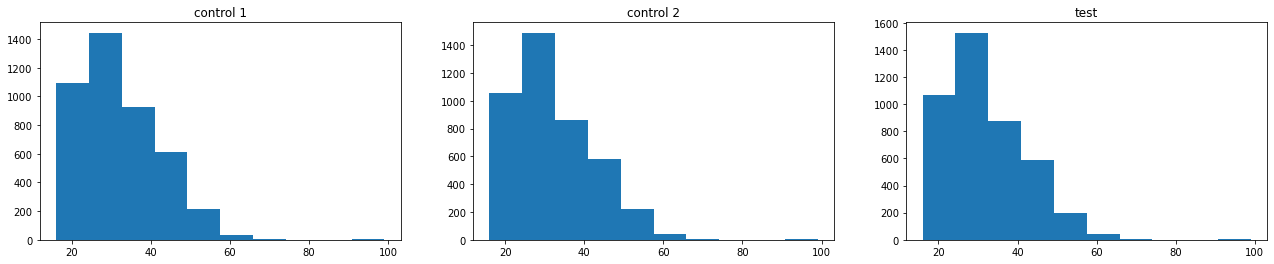

In [8]:
# Возраст
plt.figure(figsize=(22, 4))
plt.subplot(131)
plt.title('control 1')
plt.hist(users_control_1.age)
plt.subplot(132)
plt.title('control 2')
plt.hist(users_control_2.age)
plt.subplot(133)
plt.title('test')
plt.hist(users_test.age);

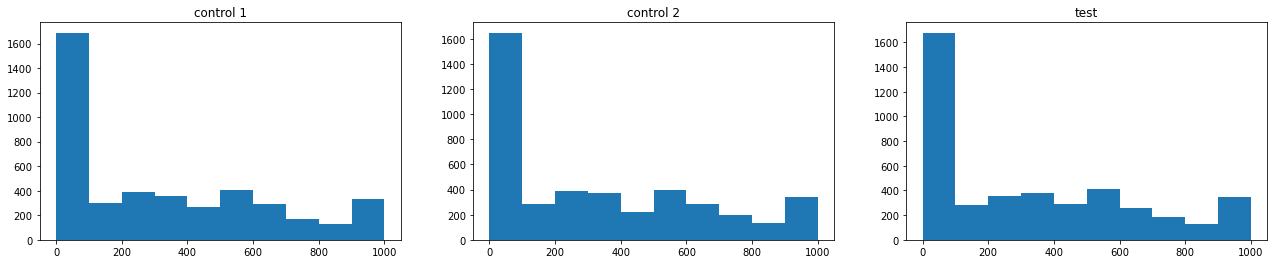

In [9]:
# Привлекательность
plt.figure(figsize=(22, 4))
plt.subplot(131)
plt.title('control 1')
plt.hist(users_control_1.attraction_coeff)
plt.subplot(132)
plt.title('control 2')
plt.hist(users_control_2.attraction_coeff)
plt.subplot(133)
plt.title('test')
plt.hist(users_test.attraction_coeff);

In [10]:
zero_revenue_c1 = (users_control_1.total_revenue == 0).sum()
zero_revenue_c2 = (users_control_2.total_revenue == 0).sum()
zero_revenue_t = (users_test.total_revenue == 0).sum()

print(f"Клиентов с нулевой выручкой {zero_revenue_c1}, всего {users_control_1.shape[0]}")
print(f"Клиентов с нулевой выручкой {zero_revenue_c2}, всего {users_control_2.shape[0]}")
print(f"Клиентов с нулевой выручкой {zero_revenue_t}, всего {users_test.shape[0]}")

Клиентов с нулевой выручкой 4148, всего 4340
Клиентов с нулевой выручкой 4077, всего 4264
Клиентов с нулевой выручкой 4162, всего 4308


In [11]:
# Пол
print(users_test.gender.value_counts())
print(users_control_1.gender.value_counts())
users_control_2.gender.value_counts()

1    4106
0     202
Name: gender, dtype: int64
1    4158
0     182
Name: gender, dtype: int64


1    4069
0     195
Name: gender, dtype: int64

In [12]:
# Премиум
print(users_test.is_premium.value_counts())
print(users_control_1.is_premium.value_counts())
users_control_2.is_premium.value_counts()

0.0    4151
1.0     157
Name: is_premium, dtype: int64
0.0    4148
1.0     192
Name: is_premium, dtype: int64


0.0    4073
1.0     191
Name: is_premium, dtype: int64

In [13]:
print(users_control_1.country.value_counts())
print(users_control_2.country.value_counts())
print(users_test.country.value_counts())

United States of America          1471
Argentina                          389
France                             370
Spain                              342
Italy                              338
Chile                              287
United Arab Emirates               207
Germany                            188
United Kingdom (Great Britain)     146
Canada                             134
Israel                             109
Belgium                            108
Portugal                           100
Australia                           50
Switzerland                         42
Ukraine                              8
Turkey                               8
India                                6
Russian Federation                   6
Mexico                               4
Tunisia                              3
Venezuela                            2
Puerto Rico                          2
Dominican Republic                   2
Egypt                                2
Algeria                  

#### Первоначальные выводы:
* У нас привалируют люди определенного пола (единички)
* есть несколько очень старых людей.
* Почти у всех клиентов выручка = 0 
* Большинство клиентов из Америки, Аргентины, Франции, Испании и Чили

Оставим 99% перцентиль клиентов по возрасту. Оставим только клиентов из стран где больше 30 клиентов.

In [14]:
# Возраст
quant_99_age_c1 = users_control_1.age.quantile(.99)
quant_99_age_c2 = users_control_2.age.quantile(.99)
quant_99_age_t = users_test.age.quantile(.99)


users_control_1 = users_control_1[users_control_1.age < quant_99_age_c1]
users_control_2 = users_control_2[users_control_2.age < quant_99_age_c2]
users_test = users_test[users_test.age < quant_99_age_t]

In [15]:
# страна 
countries = pd.DataFrame(users_control_2.country.value_counts())
countries = countries[countries.country > 30].index  # тут страны которые нужно оставить

users_control_1 = users_control_1[users_control_1.country.isin(countries)]
users_control_2 = users_control_2[users_control_2.country.isin(countries)]
users_test = users_test[users_test.country.isin(countries)]

### Поанализируем датафрейм с транзакциями

In [16]:
# сразу видно, что у нас достаточно мало строк с информацией здесь (всего 377 из 1007). Оставим только их! 
tr_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [17]:
tr_control_1 = tr_control_1[~tr_control_1.uid.isna()]
tr_control_2 = tr_control_2[~tr_control_2.uid.isna()]
tr_test = tr_test[~tr_test.uid.isna()]

In [18]:
# преобразуем форматы
tr_control_1.uid = tr_control_1.uid.astype('int64')
tr_control_2.uid = tr_control_2.uid.astype('int64')
tr_test.uid = tr_test.uid.astype('int64')

func = lambda s: pd.to_datetime(s[:10])

tr_control_1.joined_at = tr_control_1.joined_at.apply(func)
tr_control_1.paid_at = tr_control_1.paid_at.apply(func)

tr_control_2.joined_at = tr_control_2.joined_at.apply(func)
tr_control_2.paid_at = tr_control_2.paid_at.apply(func)

tr_test.joined_at = tr_test.joined_at.apply(func)
tr_test.paid_at = tr_test.paid_at.apply(func)

In [19]:
# join таблиц
control_1 = tr_control_1.merge(users_control_1, on=['uid', 'country'])
control_2 = tr_control_2.merge(users_control_2, on=['uid', 'country'])
test = tr_test.merge(users_test, on=['uid', 'country'])

In [20]:
# не все столбцы нам нужны в дальнейшем анализе, поэтому уберем их и перобразуем формат данных

control_1.drop(['payment_id', 'visit_days', "joined_at", 'paid_at', 'coins', 
                'age_filter_start', 'age_filter_end'], axis=1, inplace=True)

control_2.drop(['payment_id', 'visit_days', "joined_at", 'paid_at', 
                'coins', 'age_filter_start', 'age_filter_end'], axis=1, inplace=True)

test.drop(['payment_id', 'visit_days', 'age_filter_start', "joined_at", 'paid_at', 
           'coins', 'age_filter_end'], axis=1, inplace=True)


# для красоты переведу в int
columns = ['revenue', 'gender', 'was_premium', 'is_premium', 'attraction_coeff', 'views_count', 'age'] 
control_1[columns] = control_1[columns].astype('int64')
control_2[columns] = control_2[columns].astype('int64')
test[columns] = test[columns].astype('int64')

In [21]:
# посмотрим что получилось
control_2.head()

,uid,country,revenue,from_page,product_type,age,attraction_coeff,gender,views_count,was_premium,is_premium,total_revenue
0,891266616,Argentina,6305,autorefill,coins,28,229,1,48,1,1,18902
1,891266616,Argentina,6305,empty_likes,coins,28,229,1,48,1,1,18902
2,891266616,Argentina,6292,promo_09,premium_no_trial,28,229,1,48,1,1,18902
3,892186737,Chile,4732,promo_09,premium_no_trial,30,250,1,8,1,1,4732
4,891959004,United States of America,10153,trial_vip_popup,trial_premium,45,0,1,0,1,1,10153


Для удобства соединим все таблицы в одну!

In [22]:
control_1['experimentVariant'] = 'control_1'
control_2['experimentVariant'] = 'control_2'
test['experimentVariant'] = 'test'

data = pd.concat([control_1, control_2, test])

In [23]:
# Предобработка завершена! С этой таблицей и будем работать дальше
data.head()

,uid,country,revenue,from_page,product_type,age,attraction_coeff,gender,views_count,was_premium,is_premium,total_revenue,experimentVariant
0,891319275,France,12727,trial_vip_popup,trial_premium,27,0,1,2,1,1,13455,control_1
1,891319275,France,728,ad_to_photo,coins,27,0,1,2,1,1,13455,control_1
2,892421826,Israel,14586,trial_vip_popup,trial_premium,31,43,1,69,1,1,14586,control_1
3,891822480,Italy,1911,none,coins,28,337,1,77,1,1,17810,control_1
4,891822480,Italy,1898,none,coins,28,337,1,77,1,1,17810,control_1


>Cюдя по всему, было проведено А/А/Б тестирование, так как у нас есть две контрольных группы.
Чтобы понять достаточно ли схожи две контрольные группы (control_1, control_2) и был ли эксперимент успешен в целом, проведем t-test, а затем разделим пользователей на различные когорты и посмотрим на то,  сколько они (различные когорты людей) потратили денег в нашем приложении и сравним эти показатели в контрольной группе и тестовой

**Для начала сформулируем гипотезу:** 

$$H_0 : Revenue_{group_{1}} = Revenue_{group_{2}}$$

$$H_1 : Revenue_{group_{1}} \neq Revenue_{group_{2}} $$

Будет проверять ее на `5% уровне значимости`

Поскольку для проведения `t-test` неоходима независимость наблюдей, но в наших данных один человек мог совершить несколько покупок! Поэтому мы будем смотреть на общую сумму трат каждого пользователя `total_revenue`

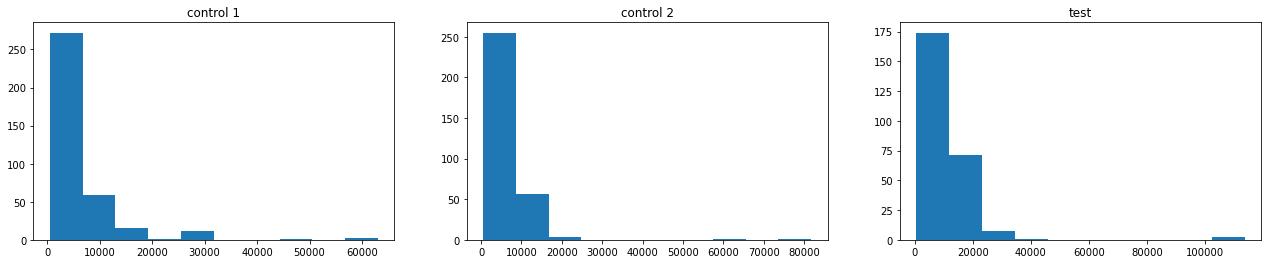

In [24]:
# выручка
plt.figure(figsize=(22, 4))
plt.subplot(131)
plt.title('control 1')
plt.hist(data[data.experimentVariant == 'control_1'].revenue)
plt.subplot(132)
plt.title('control 2')
plt.hist(data[data.experimentVariant == 'control_2'].revenue)
plt.subplot(133)
plt.title('test')
plt.hist(data[data.experimentVariant == 'test'].revenue);

In [25]:
# Поскольку если человек совершил несколько покупок, ему несколько раз одно и то же запишется в total_revenue, нам
# нужно будет удалить дубликаты
rev_cont1 = data[data.experimentVariant == 'control_1'][['uid', 'total_revenue']].drop_duplicates().total_revenue + 1
rev_cont2 = data[data.experimentVariant == 'control_2'][['uid', 'total_revenue']].drop_duplicates().total_revenue + 1
rev_test = data[data.experimentVariant == 'test'][['uid', 'total_revenue']].drop_duplicates().total_revenue + 1

In [40]:
# теперь можем проводить t-test
p_value = stats.ttest_ind(rev_cont1, rev_cont2)[1]
print(f'p-value для контрольных групп = {p_value:.3f}')

p-value для контрольных групп = 0.253


А/А тест проведен корректно, можем брять любую контрольную группу и смотреть на результаты А/Б теста

In [41]:
p_value = stats.ttest_ind(rev_cont2, rev_test)[1]
print(f'p-value для контрольной 2 и тестовой групп = {p_value:.3f}')

p-value для контрольной 2 и тестовой групп = 0.001


*Посмотрим также только на тех пользователей, кто купил премиум подписку*

In [42]:
rev_cont2_prem = data[(data.experimentVariant == 'control_2') & (data.product_type == 'premium_no_trial')][['uid', 'total_revenue']].drop_duplicates().total_revenue + 1

rev_test_prem = data[(data.experimentVariant == 'test') & (data.product_type == 'premium_no_trial')][['uid', 'total_revenue']].drop_duplicates().total_revenue + 1

In [44]:
p_value = stats.ttest_ind(rev_cont1_prem, rev_cont2_prem)[1]
print(f'p-value для контрольных групп = {p_value:.3f}')

p_value = stats.ttest_ind(rev_cont2_prem, rev_test_prem)[1]
print(f'p-value для контрольной 2 и тестовой групп = {p_value:.3f}')

p-value для контрольных групп = 0.258
p-value для контрольной 2 и тестовой групп = 0.007


**Выводы:**
1. Мы не можем отвергнуть гипотезу о том, что `revenue` в контрольных группах одинаковые на 5% уровне значимости
2. Мы отвергаем гипотезу о равенстве `revenue` для тестовой и контрольной группе на 5% уровне значимости и принимаем альтернативную гипотезу.

Такой же вывод для пользователей с премиум подпиской.

> Сделовательно, A/A тест проведен успешно, и А/Б тоже показал различия (для контрольной группы2).

# Далее мы будем смотреть на изменения у различных групп пользователей

Узнаем первый самый простой показатель, это ARPU

In [45]:
# использую метод describe(), чтобы так же видеть и другие статистические данные
data[data.experimentVariant == 'control_2'].groupby('uid', as_index=False).agg({"revenue": "sum"}).revenue.describe()

count      183.000000
mean     10245.491803
std       9370.226387
min        481.000000
25%       6025.500000
50%       7813.000000
75%      12727.000000
max      81796.000000
Name: revenue, dtype: float64

In [46]:
data[data.experimentVariant == 'test'].groupby('uid', as_index=False).agg({"revenue": "sum"}).revenue.describe()

count       141.000000
mean      15998.390071
std       18513.285292
min         624.000000
25%        8242.000000
50%       12727.000000
75%       16471.000000
max      129870.000000
Name: revenue, dtype: float64

Теперь посчитаем ARPU, только для тех, кто купил премиум подписку

In [80]:
data[data.experimentVariant == 'control_2'].query("product_type == ('premium_no_trial')")\
                                           .groupby('uid', as_index=False).agg({"revenue": "sum"})\
                                           .revenue.describe()

count      100.000000
mean      7343.960000
std       9648.152035
min       1482.000000
25%       4722.250000
50%       6292.000000
75%       6305.000000
max      81796.000000
Name: revenue, dtype: float64

In [81]:
data[data.experimentVariant == 'test'].query("product_type == ('premium_no_trial')")\
                                      .groupby('uid', as_index=False).agg({"revenue": "sum"})\
                                      .revenue.describe()

count        63.000000
mean      12273.238095
std       18848.251313
min        1898.000000
25%        6292.000000
50%        8697.000000
75%       12597.000000
max      113477.000000
Name: revenue, dtype: float64

**Итак мы получаем вот такие показатели:** 

группа `control_2` 
- ARPU(по всем покупкам) - 10245 и всего 183 уникальных пользователя,
- ARPU только тех, кто купил премиум подписку 7344, таких пользователей было 100
% пользователей, кто купил премиум подписку 55% (100/183*100 = 55%)

группа `test` 
- ARPU(по всем покупкам) - 15998 и всего 141 уникальных пользователя,
- ARPU только тех, кто купил премиум подписку 12273, таких пользователей было 63
% пользователей, кто купил премиум подписку 45% (63/141*100 = 45%)

>Eсли делать предварительный вывод, я бы сказала, что эксперимент был в целом успешен, так как ARPU в тестовой группе выше(так же как и медиана), хотя, пользователей, купивших премиум подписку стало на 5-9% меньше  (возможно, новый вариант оплаты чуть сложнее по началу,может содержать дополнительный шаг или что-то в этом роде, но позже, когда плата списывается автоматически, пользователи дольше ее не отключают из-за более низкой стоимости и тратят в итоге больше денег) 

#### Посмотрим ARPU по разным типам пользователей, для тех, кто купил премиум подписку, начнем с пола пользователя 

In [47]:
data[data.experimentVariant == 'control_2'].query("gender == 0").query("product_type == ('premium_no_trial')")\
                                           .groupby('uid', as_index=False).agg({"revenue": "sum"}).revenue.describe()

count       5.000000
mean     5080.400000
std      1184.120898
min      3588.000000
25%      4537.000000
50%      4693.000000
75%      6292.000000
max      6292.000000
Name: revenue, dtype: float64

In [48]:
data[data.experimentVariant == 'control_2'].query("gender == 1").query("product_type == ('premium_no_trial')")\
                                           .groupby('uid', as_index=False).agg({"revenue": "sum"}).revenue.describe()

count       95.000000
mean      7463.094737
std       9883.912084
min       1482.000000
25%       4732.000000
50%       6292.000000
75%       6357.000000
max      81796.000000
Name: revenue, dtype: float64

In [49]:
data[data.experimentVariant == 'test'].query("gender == 0").query("product_type == ('premium_no_trial')")\
                                      .groupby('uid', as_index=False).agg({"revenue": "sum"}).revenue.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: revenue, dtype: float64

In [50]:
data[data.experimentVariant == 'test'].query("gender == 1").query("product_type == ('premium_no_trial')")\
                                      .groupby('uid', as_index=False).agg({"revenue": "sum"}).revenue.describe()

count        63.000000
mean      12273.238095
std       18848.251313
min        1898.000000
25%        6292.000000
50%        8697.000000
75%       12597.000000
max      113477.000000
Name: revenue, dtype: float64

Из данных мы видим:
* в группе control_2, 5 пользователей пол "0", которые купили премиум подписку, ARPU = 5080, а ARPU для пользователей пола "1" = 7463

* в группе test, нет пользователей пол "0", которые купили премиум подписку, а ARPU для пользователей пола "1" = 12273

>На мой взгляд, в данной ситуации далее можно не делать различия по полу, так как выборка для пола "0" слишком мала

#### Посмотрим на ARPU по странам пользователей(берем только пользователей,которые купили премиум подписку)

In [51]:
# тут я понала,нет разницы какой датафрейм использовать data[data.experimentVariant == 'control_2']
# или control_2 и дальше для краткости обращалась к control_2
ARPU_per_country_control_2 = control_2.query("product_type == ('premium_no_trial')")\
                                      .groupby(['uid', 'country'], as_index=False)\
                                      .agg({"revenue": "sum"}).groupby('country', as_index=False)\
                                      .agg({'uid': 'count', "revenue": "sum"})
ARPU_per_country_control_2['arpu'] = ARPU_per_country_control_2.revenue / ARPU_per_country_control_2.uid
ARPU_per_country_control_2.sort_values('arpu', ascending=False)

,country,uid,revenue,arpu
12,United Arab Emirates,4,99294,24823.500000
10,Spain,10,121732,12173.200000
1,Australia,1,9438,9438.000000
0,Argentina,7,50245,7177.857143
6,Germany,3,20501,6833.666667
2,Belgium,5,32695,6539.000000
13,United Kingdom (Great Britain),9,58591,6510.111111
8,Italy,4,25623,6405.750000
7,Israel,2,12584,6292.000000
4,Chile,6,34632,5772.000000


In [52]:
ARPU_per_country_test = test.query("product_type == ('premium_no_trial')")\
                            .groupby(['uid', 'country'], as_index=False)\
                            .agg({"revenue": "sum"}).groupby('country', as_index=False)\
                            .agg({'uid': 'count', "revenue": "sum"})
ARPU_per_country_test['arpu_test'] = ARPU_per_country_test.revenue / ARPU_per_country_test.uid
ARPU_per_country_test.sort_values('arpu_test', ascending=False)

,country,uid,revenue,arpu_test
10,United Arab Emirates,6,163956,27326.000000
9,Spain,6,149513,24918.833333
1,Australia,1,12597,12597.000000
2,Belgium,1,12597,12597.000000
7,Israel,2,25194,12597.000000
4,Chile,4,49088,12272.000000
0,Argentina,5,49413,9882.600000
12,United States of America,18,165750,9208.333333
8,Italy,7,59202,8457.428571
3,Canada,3,24479,8159.666667


In [53]:
a = ARPU_per_country_control_2.merge(ARPU_per_country_test, on='country', how='left')
a = a.fillna(0)

In [54]:
a['arpu_dif'] = a.arpu_test - a.arpu
a.sort_values('arpu_dif', ascending=False)

,country,uid_x,revenue_x,arpu,uid_y,revenue_y,arpu_test,arpu_dif
10,Spain,10,121732,12173.200000,6.0,149513.0,24918.833333,12745.633333
4,Chile,6,34632,5772.000000,4.0,49088.0,12272.000000,6500.000000
7,Israel,2,12584,6292.000000,2.0,25194.0,12597.000000,6305.000000
2,Belgium,5,32695,6539.000000,1.0,12597.0,12597.000000,6058.000000
3,Canada,1,3549,3549.000000,3.0,24479.0,8159.666667,4610.666667
14,United States of America,32,181675,5677.343750,18.0,165750.0,9208.333333,3530.989583
1,Australia,1,9438,9438.000000,1.0,12597.0,12597.000000,3159.000000
0,Argentina,7,50245,7177.857143,5.0,49413.0,9882.600000,2704.742857
12,United Arab Emirates,4,99294,24823.500000,6.0,163956.0,27326.000000,2502.500000
8,Italy,4,25623,6405.750000,7.0,59202.0,8457.428571,2051.678571


Из данных выше мы можем понять в каких страннах ARPU поднялось сильнее, а в каких уменьшилось. Но не стоит забывать, что в общем ARPU повысилось.

>Я бы сказала, что новая система оплаты особенно увеличила затраты пользователей из Испании, Чили,Израиля и Бельгии
но понизила затраты пользователей из Швейцарии, Португалии и Германии

#### Посмотрим на ARPU пользователей в зависимости от числа полученных оценок
сначала посмотрим на количество оценок по квантилям и разобьем пользователей каждой группы на три типа

In [55]:
control_2.views_count.describe()

count      317.000000
mean       281.236593
std       1020.536880
min          0.000000
25%         21.000000
50%         73.000000
75%        212.000000
max      16157.000000
Name: views_count, dtype: float64

In [56]:
test.views_count.describe()

count     255.000000
mean      200.745098
std       317.037334
min         0.000000
25%        30.000000
50%        86.000000
75%       219.000000
max      1326.000000
Name: views_count, dtype: float64

Посчитаем ARPU пользователей(купивших премиум), у которых `[0-25]` оценок, `[26-77]`, `[78-210]`, и больше `210` оценок

In [57]:
control_2.query("product_type == ('premium_no_trial')").query('views_count <= 25')\
                                                       .groupby('uid', as_index=False)\
                                                       .agg({"revenue": "sum"}).revenue.describe()

count       35.000000
mean      5366.400000
std       1926.942384
min       1482.000000
25%       4537.000000
50%       5278.000000
75%       6292.000000
max      10413.000000
Name: revenue, dtype: float64

In [58]:
test.query("product_type == ('premium_no_trial')").query('views_count <= 25')\
                                                  .groupby('uid', as_index=False)\
                                                  .agg({"revenue": "sum"}).revenue.describe()

count       15.00000
mean      7589.40000
std       2986.54695
min       4537.00000
25%       5024.50000
50%       7371.00000
75%       8632.00000
max      12597.00000
Name: revenue, dtype: float64

In [59]:
control_2.query("product_type == ('premium_no_trial')").query('77 >= views_count >= 26')\
                                                       .groupby('uid', as_index=False)\
                                                       .agg({"revenue": "sum"}).revenue.describe()

count       31.000000
mean     10400.000000
std      16797.868395
min       3900.000000
25%       5011.500000
50%       6292.000000
75%       6376.500000
max      81796.000000
Name: revenue, dtype: float64

In [60]:
test.query("product_type == ('premium_no_trial')").query('77 >= views_count >= 26')\
                                                  .groupby('uid', as_index=False)\
                                                  .agg({"revenue": "sum"}).revenue.describe()

count       20.000000
mean      8799.050000
std       3325.153095
min       1898.000000
25%       6292.000000
50%       8684.000000
75%      12597.000000
max      12597.000000
Name: revenue, dtype: float64

In [61]:
control_2.query("product_type == ('premium_no_trial')").query('210 >= views_count >= 78')\
                                                       .groupby('uid', as_index=False)\
                                                       .agg({"revenue": "sum"}).revenue.describe()

count       17.000000
mean      7024.588235
std       2499.099714
min       4537.000000
25%       6292.000000
50%       6292.000000
75%       6435.000000
max      15457.000000
Name: revenue, dtype: float64

In [62]:
test.query("product_type == ('premium_no_trial')").query('210 >= views_count >= 78')\
                                                  .groupby('uid', as_index=False)\
                                                  .agg({"revenue": "sum"}).revenue.describe()

count       19.000000
mean     10545.736842
std       4753.071298
min       3562.000000
25%       8014.500000
50%       9217.000000
75%      12597.000000
max      24531.000000
Name: revenue, dtype: float64

In [63]:
control_2.query("product_type == ('premium_no_trial')").query('views_count > 210')\
                                                       .groupby('uid', as_index=False)\
                                                       .agg({"revenue": "sum"}).revenue.describe()

count       17.000000
mean      6162.000000
std       2128.549036
min       3588.000000
25%       4693.000000
50%       6292.000000
75%       6292.000000
max      12688.000000
Name: revenue, dtype: float64

In [64]:
test.query("product_type == ('premium_no_trial')").query('views_count > 210')\
                                                  .groupby('uid', as_index=False)\
                                                  .agg({"revenue": "sum"}).revenue.describe()

count         9.000000
mean      31447.000000
std       46567.739289
min        3835.000000
25%        7176.000000
50%        8697.000000
75%       12597.000000
max      113477.000000
Name: revenue, dtype: float64

Получились такие ARPU:
**группа [0-25] оценок** 
* control_2 = 5366 , 
* test = 7589 .

**группа[26-77]** 
* control_2 = 10400 , 
* test = 8799 .

**группа [78-210]**
* control_2 = 7025 , 
* test = 10546 .

**группа больше 210 оценок** 
* control_2 = 6162  , 
* test = 31447 .

> Из полученных данных можно заметить, что новый вариант оплаты увеличил ARPU для всех групп, кроме группы [26-77] , но для группы больше 210 более значительно.

#### Cделаем тоже самое, но с разделением на возрастные группы

In [65]:
control_2.age.describe()

count    317.000000
mean      32.170347
std        9.784837
min       16.000000
25%       25.000000
50%       29.000000
75%       39.000000
max       55.000000
Name: age, dtype: float64

In [66]:
test.age.describe()

count    255.000000
mean      31.788235
std        8.468693
min       17.000000
25%       25.000000
50%       32.000000
75%       37.000000
max       55.000000
Name: age, dtype: float64

Посчитаем ARPU пользоветелей(купивших премиум), у которым меньше 25 лет, [26-31], [32-37], и больше 37 лет

In [67]:
control_2.query("product_type == ('premium_no_trial')").query('age <= 25')\
                                                       .groupby('uid', as_index=False)\
                                                       .agg({"revenue": "sum"}).revenue.describe()

count       32.000000
mean      6305.406250
std       1764.164553
min       3900.000000
25%       4719.000000
50%       6292.000000
75%       6441.500000
max      10608.000000
Name: revenue, dtype: float64

In [68]:
test.query("product_type == ('premium_no_trial')").query('age <= 25')\
                                                  .groupby('uid', as_index=False)\
                                                  .agg({"revenue": "sum"}).revenue.describe()

count       20.000000
mean      9207.900000
std       4297.571675
min       4537.000000
25%       7101.250000
50%       8632.000000
75%       9298.250000
max      24531.000000
Name: revenue, dtype: float64

In [69]:
control_2.query("product_type == ('premium_no_trial')").query('26 <= age <= 31')\
                                                       .groupby('uid', as_index=False)\
                                                       .agg({"revenue": "sum"}).revenue.describe()

count       34.000000
mean      9200.558824
std      16375.158929
min       1482.000000
25%       3734.250000
50%       6292.000000
75%       6292.000000
max      81796.000000
Name: revenue, dtype: float64

In [70]:
test.query("product_type == ('premium_no_trial')").query('26 <= age <= 31')\
                                                  .groupby('uid', as_index=False)\
                                                  .agg({"revenue": "sum"}).revenue.describe()

count         9.000000
mean      21723.000000
std       34672.695028
min        4706.000000
25%        8268.000000
50%       11609.000000
75%       12597.000000
max      113477.000000
Name: revenue, dtype: float64

In [71]:
control_2.query("product_type == ('premium_no_trial')").query('32 <= age <= 37')\
                                                       .groupby('uid', as_index=False)\
                                                       .agg({"revenue": "sum"}).revenue.describe()

count      14.000000
mean     5938.214286
std      1175.035592
min      4095.000000
25%      4836.000000
50%      6292.000000
75%      6292.000000
max      7969.000000
Name: revenue, dtype: float64

In [72]:
test.query("product_type == ('premium_no_trial')").query('32 <= age <= 37')\
                                                  .groupby('uid', as_index=False)\
                                                  .agg({"revenue": "sum"}).revenue.describe()

count       18.000000
mean      8239.833333
std       3150.437379
min       3562.000000
25%       6301.750000
50%       7800.000000
75%      11752.000000
max      12597.000000
Name: revenue, dtype: float64

In [73]:
control_2.query("product_type == ('premium_no_trial')").query('age > 37')\
                                                       .groupby('uid', as_index=False)\
                                                       .agg({"revenue": "sum"}).revenue.describe()

count       20.000000
mean      6833.450000
std       1888.539354
min       4537.000000
25%       6292.000000
50%       6292.000000
75%       6480.500000
max      12688.000000
Name: revenue, dtype: float64

In [74]:
test.query("product_type == ('premium_no_trial')").query('age > 37')\
                                                  .groupby('uid', as_index=False)\
                                                  .agg({"revenue": "sum"}).revenue.describe()

count        16.000000
mean      15327.000000
std       26400.824709
min        1898.000000
25%        6292.000000
50%        9399.000000
75%       12597.000000
max      113477.000000
Name: revenue, dtype: float64

Получились такие ARPU:

**группа меньше 25 лет:** 
* control_2 = 6305 , 
* test = 9208.

**группа[26-31]**
* control_2 = 9200 , 
* test = 21723 .

**группа [32-37]**
* control_2 = 5938 , 
* test = 8240 .

**группа больше 37 лет** 
* control_2 = 6833 , 
* test = 12597 .

>Из этих данных видно, что ARPU для тестойвой группы увеличилось во всех группах, кроме группы меньше 25 лет.

Так же можно посмотреть на коэффициент корелляции.
Зависимость выручки не со всеми столбцами нам интересна, поэтому смотрим только на столбцы
age,attraction_coeff,views_count

In [75]:
# я взяла только пользователей купивших премиум и посмотрела с чем сильнее всего всязана выручка
data[data.experimentVariant == 'control_2'].query("product_type == 'premium_no_trial'")\
                                           .corr()['total_revenue'].sort_values(ascending=False)

total_revenue       1.000000
revenue             0.842703
is_premium          0.164621
age                 0.120235
uid                 0.117518
gender              0.106752
views_count        -0.024512
attraction_coeff   -0.055232
was_premium              NaN
Name: total_revenue, dtype: float64

In [76]:
data[data.experimentVariant == 'test'].query("product_type == 'premium_no_trial'")\
                                      .corr()['total_revenue'].sort_values(ascending=False)

total_revenue       1.000000
revenue             0.802120
views_count         0.434638
is_premium          0.119680
age                -0.044102
uid                -0.067652
attraction_coeff   -0.130144
gender                   NaN
was_premium              NaN
Name: total_revenue, dtype: float64

## Итоговые выводы: 
Экперимент успешен в целом,новый способ оплаты приносит больше денег компании
(возможно стоит сделать тесты по более узким группам и посмотреть на результат).

>На мой взгляд наибольший положительный эффект от новых способов оплаты ощутили пользователи с количеством оценок больше 210 оценок (скорее всего это лояльные пользователи, которые людят приложение и хорошо отностятся к его незначительным изменениям). Все возрастные группы, кроме людей младше 25 лет, хорошо отнеслись к изменению оплаты (увеличили свои траты в приложении), возможно, это связано с платежными системами.Так же ARPU сильно увеличилась в таких странах, как: Испания, Чили,Израиль и Бельгия. Это так же может быть связано с популярностью карт(платежных систем), которые используют в разных странах.